<a href="https://colab.research.google.com/github/ayj22/Decision-Tree-Titanic-hyperparameter/blob/master/Decision_Tree_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment we are going to apply decision tree model on titanic dataset. These model will be 2 time, first will be with random parameter which will be choose by the agorithm itself. In the second round we will find the best parameters for the specific model and using those parameter wwe will train the model.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing datasets
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [0]:
#Dropping unproductive table
train_data.drop("Unnamed: 0",axis=1, inplace= True)
test_data.drop("Unnamed: 0",axis=1, inplace= True)
train_data.drop("PassengerId",axis=1, inplace= True)
test_data.drop("PassengerId",axis=1, inplace= True)

In [0]:
#Spliting datasets into dependent & independent variable
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("Survived", axis=1)
y_test = test_data["Survived"]

#Training the Decision Tree Regression Model

In [5]:
#Applying the model on the dataset
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(random_state = 42)
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

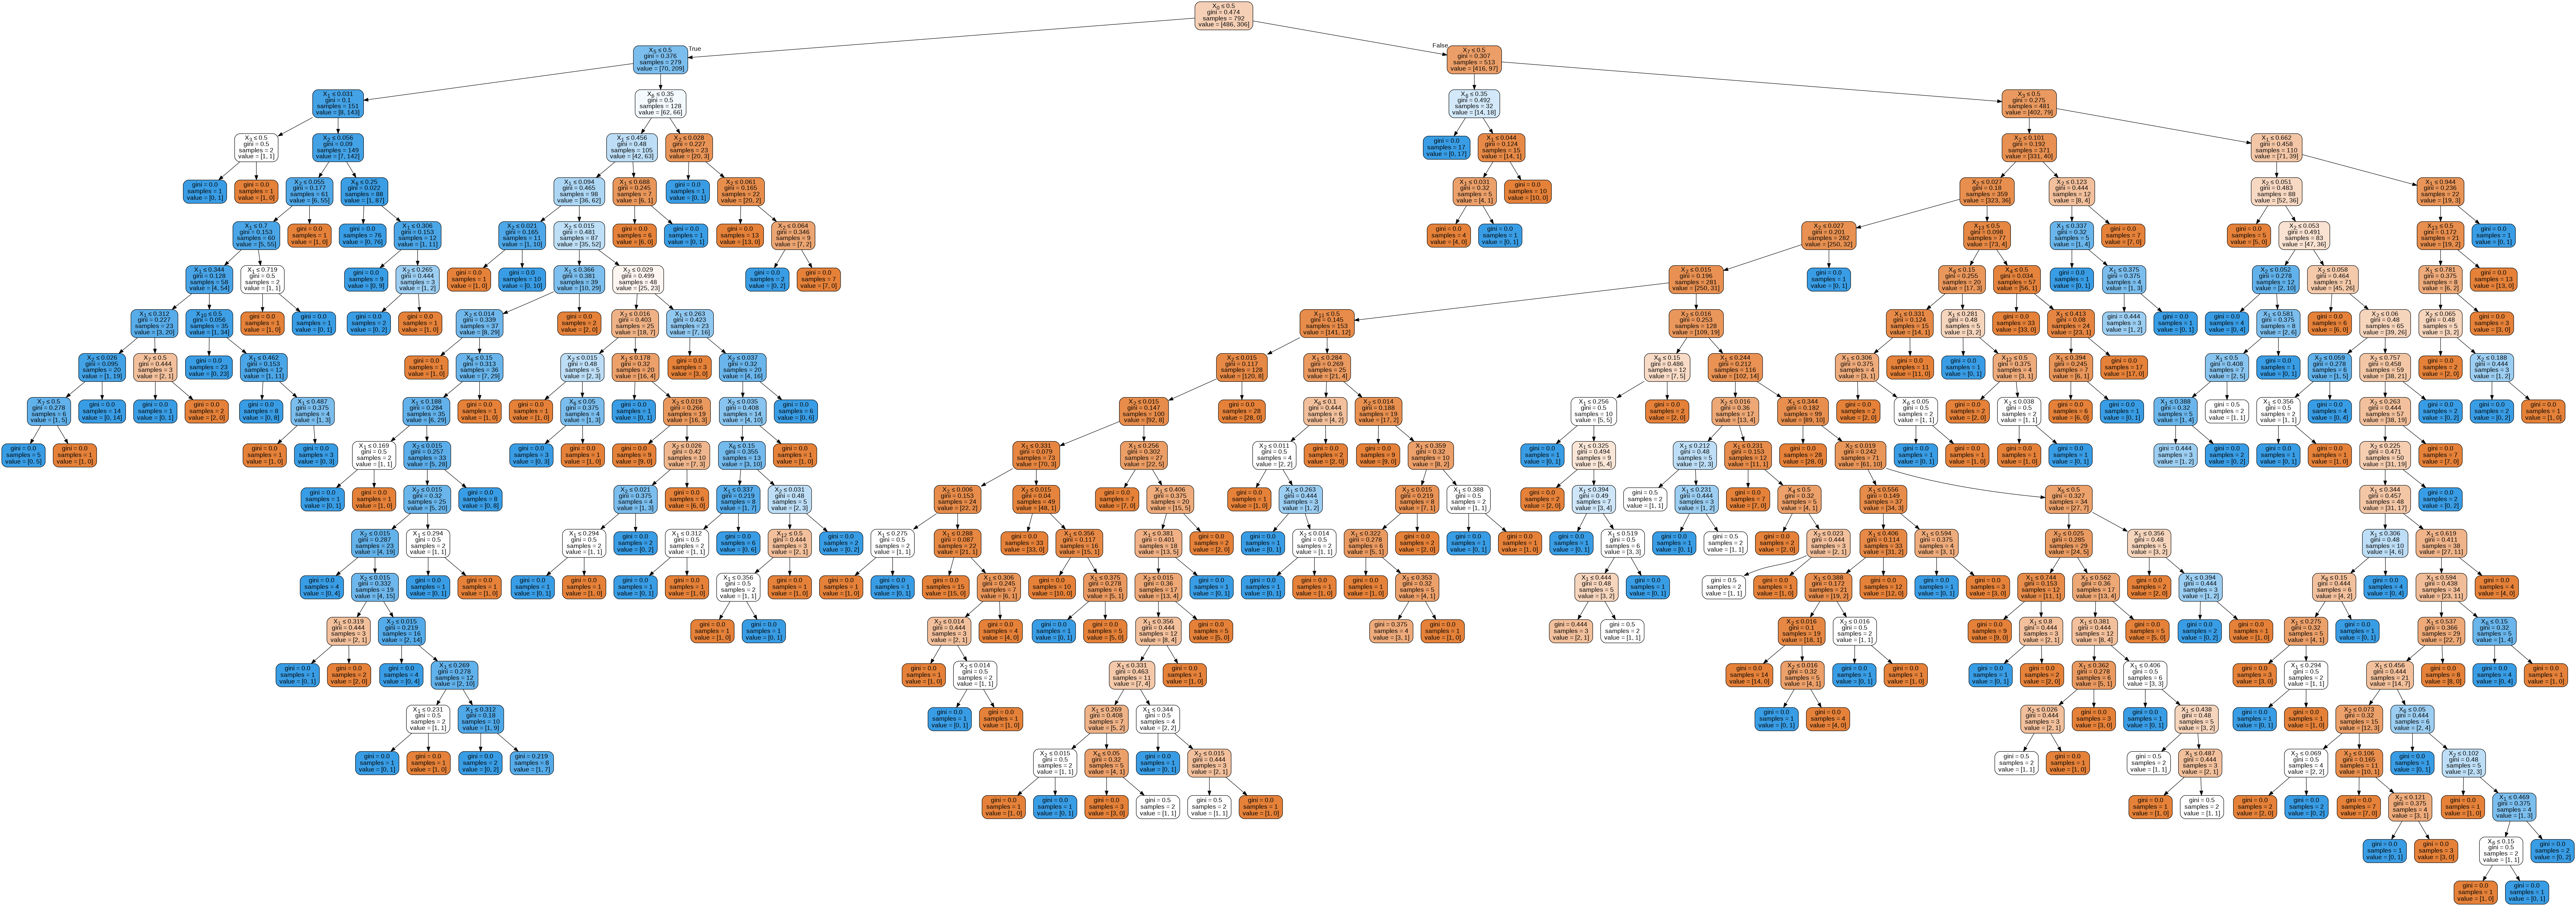

In [7]:
#Diagram of decision tree without optimal parameters
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [8]:
#Predicting the values on test dataset
y_pred1 = classifier1.predict(X_test)
y_pred1


array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [17]:
#Calculating the precision score 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred1)

0.7

In the first step we have got the precision score as 0.70 which is bit low accuracy.

#DECISION TREE 2 : WITH HYPERPARAMETERS

In this step we are going to apply two different types of hyperparameter finding technqure i.e. GridSearchCV & RandomizedSearchCV.

###Applying Grid search cross-validation hyperparameter

In this step we have provided the range of the parameter so that the model doesn't run for long as our dataset is small we dont need to put high values.

In [0]:
#Create a hyperparameter grid for Decision Tree Classifier
dt_grid = {"max_depth": [None, 3, 5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}
           

In [12]:
%%time
#Setting_up Grid hyper parameter search.
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(DecisionTreeClassifier(),
                         param_grid = dt_grid,
                         cv = 10,
                         verbose  =True)

#Fit grid searchcv hyper parameter to the model
gs_dt.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 14.8 s, sys: 20.1 ms, total: 14.8 s
Wall time: 14.8 s


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   14.8s finished


In this step we are finding the best parameter as a outcome after applying GridSearchCV.

In [14]:
#Best parameter suggested by GridSearchCV
gs_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 18}

In [43]:
#Reapplying model on the training dataset with parameters provided by GridSearchCV
from sklearn.tree import DecisionTreeClassifier
classifier_gs = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf=7, min_samples_split=18 ,random_state= 42)
classifier_gs.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
y_pred2_gs = classifier_gs.predict(X_test)
y_pred2_gs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [37]:
#Precision score after applying the given meterics
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2_gs)

0.7142857142857143

There is no significant enhacement in the score of the model with the best parameters.

##Applying Randomized search cross-validation hyperparameter

In [18]:
%%time
#Tuning Random Forest Classifier
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV
#Setup randomizedsearchcv for Random forest classifier
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                          param_distributions = dt_grid,
                          cv=10,
                          n_iter = 20,
                          verbose= True)

#fit randomizedsearchcv for random forest classifier
rs_dt.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 874 ms, sys: 4.04 ms, total: 878 ms
Wall time: 879 ms


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


In this step we are finding the best parameter as a outcome after applying RandomizedSearchCV.

In [23]:
#Best parameter given by RandomizedSearchCV
rs_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 14}

In [38]:
#Reapplying model on the training dataset with parameters provided by RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
classifier2_rs = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf=3, min_samples_split=14 ,random_state= 42)
classifier2_rs.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
#Prediction values given after using parameter given by RandomizedSearchCV
y_pred2_rs = classifier2_rs.predict(X_test)
y_pred2_rs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [41]:
#Precison Score of the model with best parameters given by RandomizedSearchCV
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2_rs)

0.7941176470588235

As we can see that the the accuracy of the model has increase to 0.79 which is higher then the previous parameter. So we can have more accurate results with best parameters.

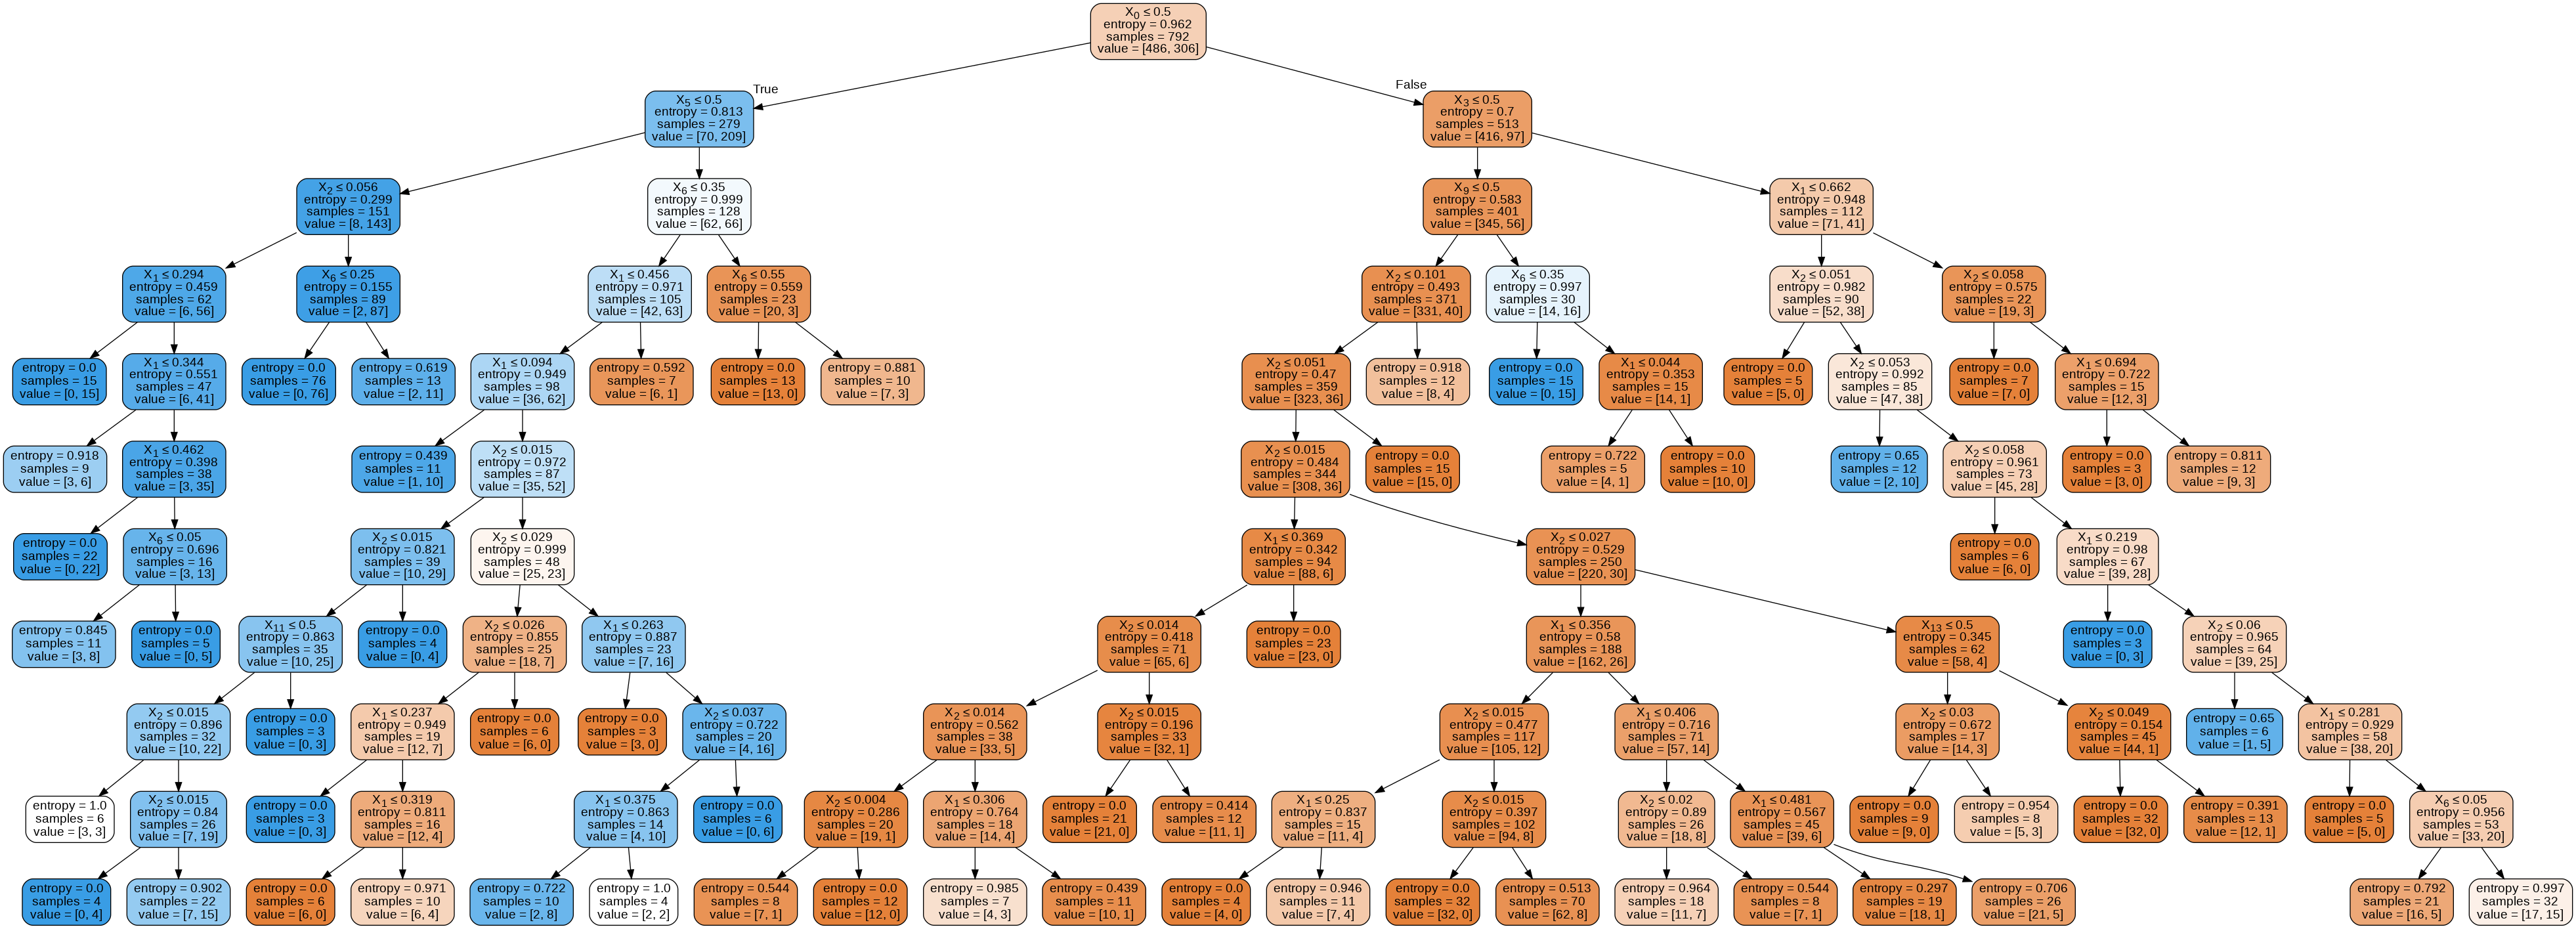

In [42]:
#Decision tree with the optimal parameters given by RandomizedSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier2_rs, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Concluison:**

In the conclusion i would like to say that Randomized search cross validation technique is more roobust as the parameter search technoque is totally random as shown in the diagram.

image.png